In [19]:
import pandas as pd
from plotnine import *

In [20]:
data_cpp_raw = pd.read_csv("output/population_results.csv")
data_py_raw = pd.read_csv("../gibraltar_example/simulation_outputs/output_gibraltar.csv")

In [21]:
data_py_raw['timestep'] = data_py_raw['time']
data_py_raw['Susceptible'] = data_py_raw['InfectionStatus.Susceptible']
data_py_raw['Recovered'] = data_py_raw['InfectionStatus.Recovered']
data_py_raw['Exposed'] = data_py_raw['InfectionStatus.Exposed']
data_py_raw['Infected'] =\
    + data_py_raw['InfectionStatus.InfectASympt']\
    + data_py_raw['InfectionStatus.InfectMild']\
    + data_py_raw['InfectionStatus.InfectGP']\
    + data_py_raw['InfectionStatus.InfectHosp']\
    + data_py_raw['InfectionStatus.InfectICU']\
    + data_py_raw['InfectionStatus.InfectICURecov']
data_py = data_py_raw[['timestep', 'Exposed', 'Susceptible', 'Recovered', 'Infected']]
data_py = data_py.groupby('timestep').sum().reset_index()

In [22]:
data_cpp_raw['Infected'] = data_cpp_raw['InfectASympt'] +\
    data_cpp_raw['InfectMild'] + data_cpp_raw['InfectGP'] + data_cpp_raw['InfectHosp'] +\
        data_cpp_raw['InfectICU'] + data_cpp_raw['InfectICURecov']
data_cpp = data_cpp_raw[['timestep', 'Exposed', 'Susceptible', 'Recovered', 'Infected']]

In [23]:
data_cpp['version'] = 'cEpiabm'
data_py['version'] = 'pyEpiabm'
data = pd.concat([data_cpp,data_py])

/tmp/ipykernel_7561/212435394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


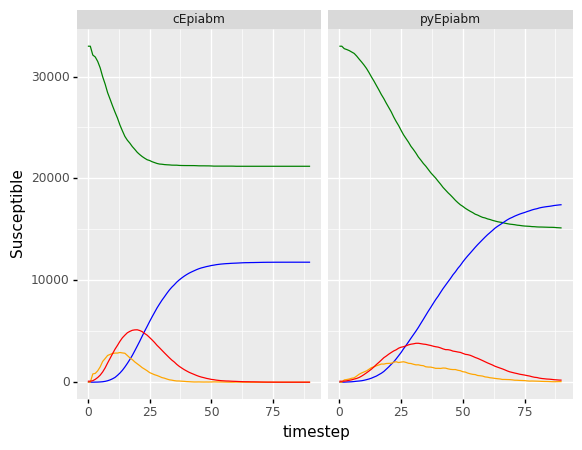

<ggplot: (8737292924760)>

In [24]:
(
    ggplot(data, aes(x='timestep', group='version'))
    + geom_line(aes(y='Susceptible'), colour='Green')
    + geom_line(aes(y='Recovered'), colour='Blue')
    + geom_line(aes(y='Exposed'), colour='Orange')
    + geom_line(aes(y='Infected'), colour='Red')
    + facet_wrap('version')
)